Cluster Centers: [[-0.55124567 -1.82634825]
 [ 2.73157547 -1.77297657]
 [ 1.20144461  0.60556754]
 [-0.09878209  0.56407638]
 [-0.67436103  0.52411207]]
Cluster Membership: [2 3 4 3 3 4 3 3 3 3 4 3 4 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 2 2 3 3 3 2 3 3 3 2 2 3 2 3 3 3 3 3 4 3 3 3 3 3 2 2 2 2 2 2 2 2 4 3 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 3 3 4 3 4 4 3 2 2 1 1 1 1 0 1
 1 1 3 3 3 3 4 4 4 3 4 4 4 2 3 4 2 2 0 1 1 3 3 3 3 3 4 4 4 4 3 4 4 4 3 3 4
 4 4 4 2 3 4 4 4 4 2 3 3 3 3 2 4 3 2 2 0 0 0 1 0 0 0 2 0 3 3 3 3 4 0 0 0 0
 4 3 2 2 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


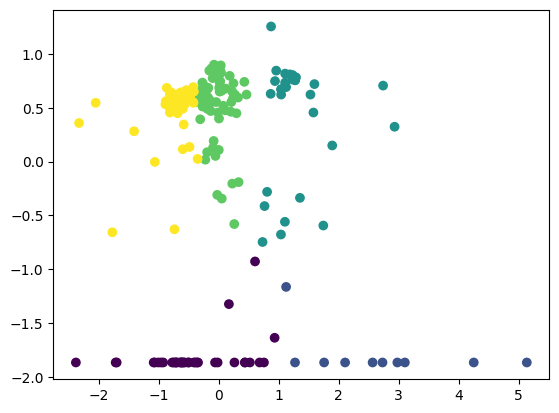

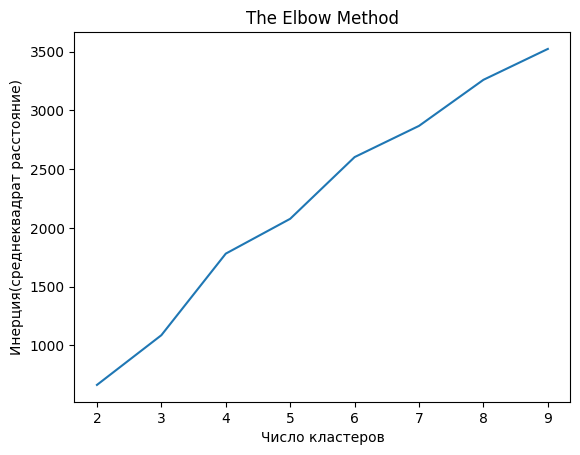

C:\Users\cfifz\AppData\Local\Temp\ipykernel_1524\1554931454.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, Silhouette_measure, 'bx-', color='green')


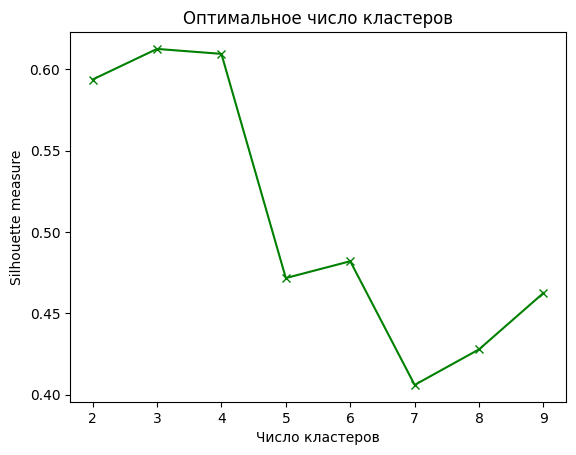

C:\Users\cfifz\PycharmProjects\pythonProject3\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


Adjusted Rand Index: 0.2068692936459603
6


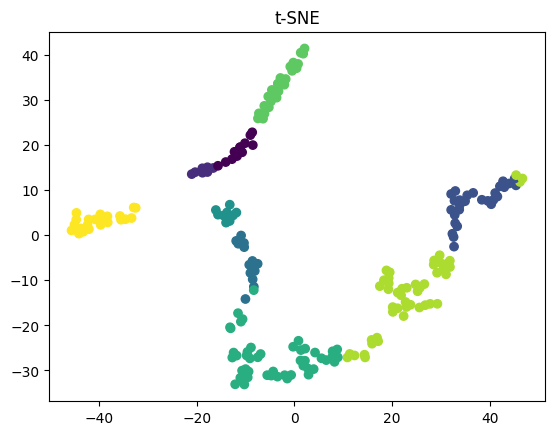

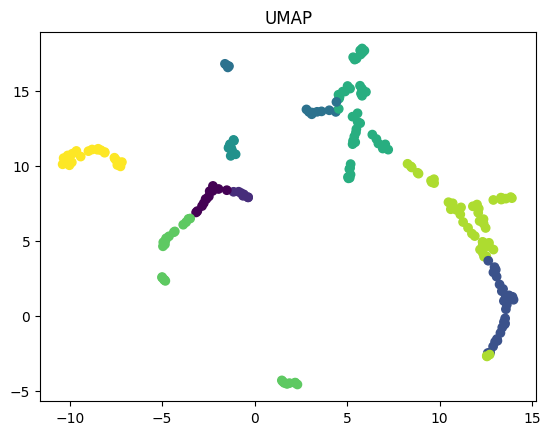

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)

df = pd.read_csv('glass.csv')
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)

Z = df.iloc[:, [1, 3]].values
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z)
Z_numpy = Z.to_numpy()
n_clusters = 5
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(Z_numpy.T, n_clusters, 2, error=0.005, maxiter=100, init=None)

clusters = np.argmax(u, axis=0)

# Predict cluster membership for each data point
cluster_membership = np.argmax(u, axis=0)

print('Cluster Centers:', cntr)
print('Cluster Membership:', cluster_membership)

plt.scatter(df.iloc[:, 1], df.iloc[:, 3], c=cluster_membership, cmap='viridis')
plt.show()

# inertia value
row_sum = np.sum(d, axis=1)
inertia_value = np.sum(row_sum)

wcss = []
for i in range(2, 10):
    n_clusters = i
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(Z_numpy.T, n_clusters, 2, error=0.005, maxiter=100, init=None)
    clusters = np.argmax(u, axis=0)

    row_sum = np.sum(d, axis=1)
    inertia_value = np.sum(row_sum)
    cluster_membership = np.argmax(u, axis=0)
    wcss.append(inertia_value)

plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Число кластеров')
plt.ylabel('Инерция(среднеквадрат расстояние)')
plt.show()

Silhouette_measure = []
K = range(2, 10)
for num_clusters in K:
    n_clusters = num_clusters
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(Z_numpy.T, n_clusters, 2, error=0.005, maxiter=100, init=None)
    cluster_membership = np.argmax(u, axis=0)
    Silhouette_measure.append(silhouette_score(Z, cluster_membership))
plt.plot(K, Silhouette_measure, 'bx-', color='green')
plt.xlabel('Число кластеров')
plt.ylabel('Silhouette measure')
plt.title('Оптимальное число кластеров')
plt.show()



from sklearn.metrics import adjusted_rand_score

true_labels = df.iloc[:, 10]
cluster_labels = cluster_membership
ari = adjusted_rand_score(true_labels, cluster_labels)
print('Adjusted Rand Index:', ari)

print(df.iloc[:, 10].nunique())

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, learning_rate=200)
tsne_result = tsne.fit_transform(Z)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_membership, cmap='viridis')
plt.title('t-SNE')
plt.show()


import umap

umap_result = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.3).fit_transform(Z)

plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_membership, cmap='viridis')
plt.title('UMAP')
plt.show()